In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
finaldf = pd.read_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/reviewsfinal3.csv')

In [4]:
finaldf

,Unnamed: 0,username,location,date,stars,content,numfriends,restaurantname,state,word_count
0,0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA,18
1,1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA,23
2,2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA,463
3,3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA,247
4,4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA,339
...,...,...,...,...,...,...,...,...,...,...
20973,20980,Rick P.,"Long Beach, CA",7/5/06,3,i agree with eugenia c. when she says the serv...,198,Habana,CA,61
20974,20981,Shannon W.,"Costa Mesa, CA",2/24/13,1,"Ok, I understand why this place gets the revie...",0,Habana,CA,366
20975,20982,Thenameisfood T.,"Hacienda Heights, CA",9/11/12,4,pretty good food! bit pricey.. the Cuban Food ...,514,Habana,CA,27
20976,20983,Brett M.,"Huntington Beach, CA",3/14/10,5,"very cool dark romantic restaurant, great food...",1,Habana,CA,24


# Sentiment Analysis

In [ ]:
one_star = finaldf.loc[finaldf.stars==1]

two_stars = finaldf.loc[finaldf.stars==2]

three_stars = finaldf.loc[finaldf.stars==3]

four_stars = finaldf.loc[finaldf.stars==4]

five_stars = finaldf.loc[finaldf.stars==5]

one_star["sentiment"] = "negative"
one_star.sentiment.value_counts()
two_stars["sentiment"] = "negative"
two_stars.sentiment.value_counts()
four_stars["sentiment"] = "positive"
four_stars.sentiment.value_counts()
five_stars["sentiment"] = "positive"
five_stars.sentiment.value_counts()
sentiment = pd.concat([one_star, two_stars, four_stars,five_stars])
sentiment.sentiment.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

positive    16701
negative     2295
Name: sentiment, dtype: int64

In [ ]:
conditions = [
    (sentiment.sentiment=="positive"),
    (sentiment.sentiment=="negative")]

values = [1,0]

sentiment['sent'] = np.select(conditions, values)

In [ ]:
sentiment[:10000].stars.value_counts()

4    1705
1    1344
2     951
Name: stars, dtype: int64

# Analysis using Text blob and Vader

In [ ]:
#Text Cleaning

In [ ]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
sentiment['Cleaned Reviews'] = sentiment['content'].apply(clean)
sentiment.head()

,Unnamed: 0,username,location,date,stars,content,numfriends,Restaurant,state,sentiment,sent,Cleaned Reviews
4,4,Dr. Susan F.,"Whittier, CA",4/27/2022,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA,negative,0,We love DTF Not this location is there anythin...
36,36,Nba C.,"Irvine, CA",4/24/2022,1,You people are fools. Paying for mediocre Chin...,10,Din Tai Fung,CA,negative,0,You people are fools Paying for mediocre Chine...
40,40,Tiffany O.,"Orange County, CA",4/30/2022,1,Ordered and was told it would be ready at 7:30...,0,Din Tai Fung,CA,negative,0,Ordered and was told it would be ready at went...
54,54,Mike L.,"Irvine, CA",4/6/2022,1,We had a reservation at 11 am on Saturday. We ...,0,Din Tai Fung,CA,negative,0,We had a reservation at am on Saturday We show...
73,73,Scarlett Z.,"Costa Mesa, CA",4/30/2022,1,The food is amazing but the service is terribl...,0,Din Tai Fung,CA,negative,0,The food is amazing but the service is terribl...


In [ ]:
sentiment=sentiment.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

sentiment['POS tagged'] = sentiment['Cleaned Reviews'].apply(token_stop_pos)
sentiment.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: ignored

In [ ]:
>>> nltk.download()



NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> averaged_perceptron_tagger
        /root/nltk_data...
      Unzipping taggers/averaged_perceptron_tagger.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
sentiment['Lemma'] = sentiment['POS tagged'].apply(lemmatize)
sentiment.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

In [ ]:
sentiment[['content', 'Lemma']]

,content,Lemma
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...
...,...,...
4562,i agree with eugenia c. when she says the serv...,agree eugenia c say service could good use l...
4563,"Ok, I understand why this place gets the revie...",Ok understand place get review review primar...
4564,pretty good food! bit pricey.. the Cuban Food ...,pretty good food bit pricey Cuban Food Moros...
4565,"very cool dark romantic restaurant, great food...",cool dark romantic restaurant great food eve...


## Text Blob

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(finaldf[['content', 'Lemma','stars']])

In [ ]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()


,content,Lemma,stars,Polarity,Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative


In [ ]:
fin_data

,content,Lemma,stars,Polarity,Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative
...,...,...,...,...,...
4562,i agree with eugenia c. when she says the serv...,agree eugenia c say service could good use l...,3,0.200000,Positive
4563,"Ok, I understand why this place gets the revie...",Ok understand place get review review primar...,1,0.140764,Positive
4564,pretty good food! bit pricey.. the Cuban Food ...,pretty good food bit pricey Cuban Food Moros...,4,0.625000,Positive
4565,"very cool dark romantic restaurant, great food...",cool dark romantic restaurant great food eve...,5,0.283333,Positive


In [ ]:
fin_data.groupby(fin_data['Analysis'])['stars'].value_counts()

Analysis  stars
Negative  1          647
          2          211
          3          185
          5          183
          4          154
Neutral   5          110
          4           34
          1           24
          3           14
          2            5
Positive  5        11053
          4         5167
          3         1783
          2          735
          1          673
Name: stars, dtype: int64

In [ ]:
result=fin_data.groupby(fin_data['Analysis'])['stars'].value_counts().unstack()

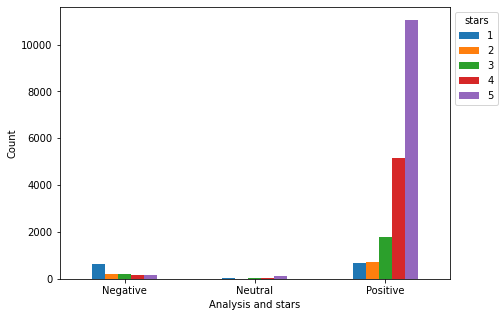

In [ ]:
res
ax = res.plot(kind='bar', figsize=(7, 5), xlabel='Analysis and stars', ylabel='Count', rot=0)
ax.legend(title='stars', bbox_to_anchor=(1, 1), loc='upper left')

## Vader


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,content,Lemma,stars,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive,0.5994,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive,0.5719,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive,0.9987,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive,0.9917,Positive
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative,-0.8890,Negative


In [ ]:
fin_data

,content,Lemma,stars,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive,0.5994,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive,0.5719,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive,0.9987,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive,0.9917,Positive
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative,-0.8890,Negative
...,...,...,...,...,...,...,...
4562,i agree with eugenia c. when she says the serv...,agree eugenia c say service could good use l...,3,0.200000,Positive,0.7579,Positive
4563,"Ok, I understand why this place gets the revie...",Ok understand place get review review primar...,1,0.140764,Positive,0.9846,Positive
4564,pretty good food! bit pricey.. the Cuban Food ...,pretty good food bit pricey Cuban Food Moros...,4,0.625000,Positive,0.9432,Positive
4565,"very cool dark romantic restaurant, great food...",cool dark romantic restaurant great food eve...,5,0.283333,Positive,0.9001,Positive


In [ ]:
res_vader=fin_data.groupby(fin_data['Vader Analysis'])['stars'].value_counts().unstack()

In [ ]:
fin_data.groupby(fin_data['Vader Analysis'])['stars'].value_counts()

Vader Analysis  stars
Negative        1          362
                2           81
                5           50
                3           44
                4           23
Neutral         5          566
                1          460
                4          293
                3          251
                2          212
Positive        5        10730
                4         5039
                3         1687
                2          658
                1          522
Name: stars, dtype: int64

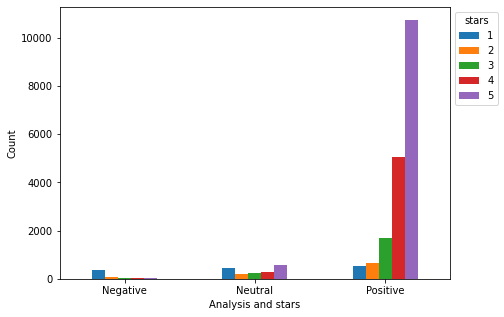

In [ ]:
ax = res_vader.plot(kind='bar', figsize=(7, 5), xlabel='Analysis and stars', ylabel='Count', rot=0)
ax.legend(title='stars', bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
bad_reviews=fin_data[((fin_data['stars']<=2))& (fin_data['Analysis']=='Negative')&(fin_data['Vader Analysis']=='Negative')]


In [ ]:
good_reviews=fin_data[((fin_data['stars']>=4) & (fin_data['Analysis']=='Positive'))&(fin_data['Vader Analysis']=='Positive')]

In [ ]:
good_reviews.stars.value_counts()

5    10589
4     4948
Name: stars, dtype: int64

In [ ]:
bad_reviews.stars.value_counts()

1    309
2     58
Name: stars, dtype: int64

# Topic Model

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
import sklearn
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as plt_gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import sklearn.feature_extraction

In [ ]:
from sklearn.feature_extraction import _stop_words

In [ ]:
import spacy
# Load the large model to get the vectors
nlp = spacy.load('en_core_web_sm')

In [ ]:
fin_data

,content,Lemma,stars,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive,0.5994,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive,0.5719,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive,0.9987,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive,0.9917,Positive
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative,-0.8890,Negative
...,...,...,...,...,...,...,...
4562,i agree with eugenia c. when she says the serv...,agree eugenia c say service could good use l...,3,0.200000,Positive,0.7579,Positive
4563,"Ok, I understand why this place gets the revie...",Ok understand place get review review primar...,1,0.140764,Positive,0.9846,Positive
4564,pretty good food! bit pricey.. the Cuban Food ...,pretty good food bit pricey Cuban Food Moros...,4,0.625000,Positive,0.9432,Positive
4565,"very cool dark romantic restaurant, great food...",cool dark romantic restaurant great food eve...,5,0.283333,Positive,0.9001,Positive


In [ ]:
bad_reviews

,content,Lemma,stars,Polarity,Analysis,Vader Sentiment,Vader Analysis
4,We love DTF!!! Not this location: is there an...,love DTF location anything good say location...,1,-0.055056,Negative,-0.8890,Negative
164,HORRENDOUS CUSTOMER SERVICE. I drove an hour t...,HORRENDOUS CUSTOMER SERVICE drive hour get w...,1,-0.114286,Negative,-0.9221,Negative
253,Food was so good but we got super sick. Last n...,Food good get super sick Last night eat thin...,2,-0.050496,Negative,-0.8271,Negative
284,Terrible service. Why eat here? So you can be ...,Terrible service eat treat like shit guess p...,1,-0.533333,Negative,-0.7184,Negative
326,Bug found in bok choy. The manager was very un...,Bug find bok choy manager unhappy give disco...,1,-0.300000,Negative,-0.8442,Negative
...,...,...,...,...,...,...,...
3931,"I read review about awful service and drinks, ...",read review awful service drink go anyway co...,2,-0.500000,Negative,-0.8588,Negative
3998,Stopped in for a specialty coffee and dessert....,Stopped specialty coffee dessert manager sea...,1,-0.212500,Negative,-0.7134,Negative
4018,"I really wanted to try you Habana, I really di...",really want try Habana really fact give part...,1,-0.085374,Negative,-0.6644,Negative
4271,"Bad bad bad. Rude staff, over priced. Enter at...",Bad bad bad Rude staff price Enter risk high...,1,-0.373333,Negative,-0.9493,Negative


In [ ]:
good_reviews

,content,Lemma,stars,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Been going here for 5+ years starting at the o...,go year start original Arcadia Amazing every...,5,0.150893,Positive,0.5994,Positive
1,Very professional and organized. Wonderful sta...,professional organize Wonderful staff wait h...,4,0.400000,Positive,0.5719,Positive
2,We came here for our anniversary as walk ins a...,come anniversary walk in experience never fa...,5,0.266739,Positive,0.9987,Positive
3,DTF? Obviously had to go to DTF for the one ti...,DTF Obviously go DTF one time hype also near...,4,0.176881,Positive,0.9917,Positive
5,"Absolutely love this place, great location too...",Absolutely love place great location meal wa...,5,0.233500,Positive,0.9931,Positive
...,...,...,...,...,...,...,...
4557,"This place is amazing. The ambiance is great,...",place amaze ambiance great color invite phot...,5,0.515714,Positive,0.9722,Positive
4558,One of my favorite restaurants in OC. I love t...,One favorite restaurant OC love ambiance ser...,5,0.500000,Positive,0.8979,Positive
4559,"they have the amazing food, the flavors are so...",amazing food flavor good love crab cake espe...,5,0.560000,Positive,0.9632,Positive
4564,pretty good food! bit pricey.. the Cuban Food ...,pretty good food bit pricey Cuban Food Moros...,4,0.625000,Positive,0.9432,Positive


In [ ]:
# Convert to list
data = good_reviews.content.values.tolist()

# Remove punctuation
#data = [re.sub('[,\.!?:;]', ' ', review) for review in data]


data = [re.sub('\"', ' ', review) for review in data]


# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", " ", sent) for sent in data]


print(data[:10])

['Been going here for 5+ years starting at the original in Arcadia. Amazing every single time. No complaints.', 'Very professional and organized. Wonderful staff. The wait is 3 hours though so get there early or call ahead a month in advance.', 'We came here for our anniversary as walk ins and the experience never fails us. We got there around 11:05 and got in line to be put on the waitlist. We were told the wait would be around 1hr- 1hr and 20 min. After an hour, we received our text and was seated rather quickly. Our servers were amazing. Super helpful and attentive. We re not the type of customers that keep tab on things like if our water runs empty, but they always came by every few minutes to check on us and always made sure we were topped off with EVERYTHING. Even when one of our dishes were not to our liking, one of our servers was kind enough to cancel it from our check. All servers and employees made sure to keep open communication with us and were attentive and professional. 

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['been', 'going', 'here', 'for', 'years', 'starting', 'at', 'the', 'original', 'in', 'arcadia', 'amazing', 'every', 'single', 'time', 'no', 'complaints']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['very', 'professional', 'and', 'organized', 'wonderful', 'staff', 'the', 'wait', 'is', 'hours', 'though', 'so', 'get', 'there', 'early', 'or', 'call_ahead', 'month', 'in', 'advance']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=[ 'NOUN','VERB','ADV','ADJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_words

In [ ]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_words=set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['duper','cuban'])
#stop_words = stopwords.words('english')

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en_core_web_sm' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[ 'NOUN','VERB','ADV','ADJ'])

print(data_lemmatized[:1])

[['go', 'year', 'start', 'original', 'arcadia', 'amazing', 'single', 'time', 'complaint']]


In [ ]:
data_words_n

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [ ]:
print('Number of unique tokens: %d' % len(texts))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 15537
Number of documents: 15537


In [ ]:
texts

## LDA

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=1500,
                                           update_every=1,
                                           chunksize=200,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"lovely" + 0.060*"vegetarian" + 0.059*"cozy" + 0.043*"comfortable" + '
  '0.028*"cooked" + 0.027*"magical" + 0.023*"oc" + 0.022*"delightful" + '
  '0.020*"safe" + 0.020*"professional"'),
 (1,
  '0.108*"romantic" + 0.093*"perfect" + 0.077*"sweet" + 0.059*"dark" + '
  '0.048*"beautiful" + 0.044*"red" + 0.039*"warm" + 0.032*"old" + '
  '0.031*"black" + 0.026*"hot"'),
 (2,
  '0.554*"amazing" + 0.018*"kind" + 0.017*"fun" + 0.015*"single" + '
  '0.015*"knowledgeable" + 0.011*"poor" + 0.009*"spectacular" + '
  '0.009*"ridiculous" + 0.009*"general" + 0.009*"refreshing"'),
 (3,
  '0.084*"high" + 0.041*"low" + 0.038*"disappointed" + 0.038*"spanish" + '
  '0.037*"heavy" + 0.032*"fabulous" + 0.030*"lucky" + 0.023*"young" + '
  '0.022*"tight" + 0.022*"surprised"'),
 (4,
  '0.415*"great" + 0.090*"delicious" + 0.060*"excellent" + 0.054*"friendly" + '
  '0.042*"awesome" + 0.033*"wonderful" + 0.030*"busy" + 0.026*"attentive" + '
  '0.021*"fantastic" + 0.016*"quick"'),
 (5,
  '0.124*"cool"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.222320544030678

Coherence Score:  0.5101958042294685


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = plt_gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
37     0.191640+0.000000j -0.079653+0.000000j       1        1  4.121057
48     0.290049+0.000000j  0.099934+0.000000j       2        1  3.669873
65     0.162355+0.000000j -0.012266+0.000000j       3        1  3.324062
41     0.244767+0.000000j -0.292986+0.000000j       4        1  2.585822
68     0.212099+0.000000j  0.085182+0.000000j       5        1  2.388836
...                   ...                 ...     ...      ...       ...
51    -0.163392+0.000000j  0.001400+0.000000j      96        1  0.035566
60    -0.163392+0.000000j  0.001400+0.000000j      97        1  0.035566
64    -0.163392+0.000000j  0.001400+0.000000j      98        1  0.035566
75    -0.163392+0.000000j  0.001400+0.000000j      99        1  0.035566
99    -0.163392+0.000000j  0.001400+0.000000j     100        1  0.035566

[100 rows x 5 colum

## Bad topic modeling

In [ ]:
# Convert to list
data = bad_reviews.content.values.tolist()

# Remove punctuation
#data = [re.sub('[,\.!?:;]', ' ', review) for review in data]


data = [re.sub('\"', ' ', review) for review in data]


# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", " ", sent) for sent in data]


print(data[:10])

['We love DTF!!! Not this location: is there anything good we can say about this location?? NO!!! From the moment we walked up to put our party of two name in at 3:20 p.m. on a Monday afternoon, it was awful!!! The two receptionists talked in whispers behind their masks and when we asked them to repeat what they were saying, the spoke at 100 mph. shouting! We are not deaf nor stupid and we should have walked away right then. We did not.Our order was simple: a veggie, two bun orders, appetizer, and noodles plus hot tea. The meal took a total of 70 minutes to be served as it dripped and drabbled out of the kitchen; the food was cold, tough, unappetizing. The wait staff was snotty, arrogant, and standing around on a noisy floor with open tables everywhere. Our server kept apologizing saying, the kitchen has some problems today; I am trying to rush each segment out. Would you like more tea? Our bill was just a few dollars short of $100 for a Monday afternoon of Linner and both of us had up

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['we', 'love', 'dtf', 'not', 'this', 'location', 'is', 'there', 'anything', 'good', 'we', 'can', 'say', 'about', 'this', 'location', 'no', 'from', 'the', 'moment', 'we', 'walked', 'up', 'to', 'put', 'our', 'party', 'of', 'two', 'name', 'in', 'at', 'on', 'monday', 'afternoon', 'it', 'was', 'awful', 'the', 'two', 'receptionists', 'talked', 'in', 'whispers', 'behind', 'their', 'masks', 'and', 'when', 'we', 'asked', 'them', 'to', 'repeat', 'what', 'they', 'were', 'saying', 'the', 'spoke', 'at', 'mph', 'shouting', 'we', 'are', 'not', 'deaf', 'nor', 'stupid', 'and', 'we', 'should', 'have', 'walked', 'away', 'right', 'then', 'we', 'did', 'not', 'our', 'order', 'was', 'simple', 'veggie', 'two', 'bun', 'orders', 'appetizer', 'and', 'noodles', 'plus', 'hot', 'tea', 'the', 'meal', 'took', 'total', 'of', 'minutes', 'to', 'be', 'served', 'as', 'it', 'dripped', 'and', 'drabbled', 'out', 'of', 'the', 'kitchen', 'the', 'food', 'was', 'cold', 'tough', 'unappetizing', 'the', 'wait', 'staff', 'was', 'sn

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['horrendous', 'customer', 'service', 'drove', 'an_hour', 'to', 'get', 'here', 'was', 'it', 'worth', 'it', 'don', 'know', 'because', 'didn', 'even', 'get', 'to', 'eat', 'there', 'they', 'said', 'it', 'would', 'take', 'an_hour', 'for', 'me', 'to', 'be', 'seated', 'waited', 'two', 'hours', 'for', 'my', 'text', 'would', 've', 'expected', 'it', 'an_hour', 'ago', 'asked', 'them', 'and', 'they', 'completely', 'ignored', 'me', 'and', 'rolled', 'their', 'eyes', 'at', 'me', 'they', 'angrily', 'told', 'me', 'that', 'it', 'would', 'take', 'another', 'hour', 'for', 'me', 'to', 'be', 'seated', 'waited', 'three', 'hours', 'for', 'seat', 'when', 'went', 'back', 'because', 'it', 'been', 'an_hour', 'and', 'half', 'they', 'said', 'that', 'it', 'would', 'take', 'another', 'hour', 'this', 'is', 'ridiculous', 'wasted', 'three', 'hours', 'and', 'thirty', 'minutes', 'waiting', 'for', 'seat', 'and', 'got', 'sassed', 'by', 'their', 'workers', 'don', 'come', 'here', 'unless', 'you', 'want', 'to', 'spend', 'hour

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_words=set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['duper','cuban'])
#stop_words = stopwords.words('english')

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en_core_web_sm' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[ 'NOUN','ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['good', 'say', 'walk', 'awful', 'talk', 'ask', 'say', 'speak', 'shout', 'walk', 'away', 'right', 'simple', 'hot', 'take', 'total', 'serve', 'drip', 'drabble', 'cold', 'tough', 'snotty', 'arrogant', 'stand', 'noisy', 'open', 'keep', 'apologize', 'say', 'try', 'short', 'upset', 'stomachs', 'long', 'eat', 'mean', 'undercooked', 'spoiled', 'eat', 'awful', 'figure', 'go', 'right', 'retail', 'say', 'fung', 'corporate', 'right', 'retail', 'expensive', 'go', 'quickly', 'embarrassed', 'shocked', 'stay', 'hope', 'well', 'complain', 'corporate', 'far', 'large', 'dissatisfied']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=1500,
                                           update_every=1,
                                           chunksize=200,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.070*"bad" + 0.026*"dirty" + 0.025*"take" + 0.021*"good" + 0.020*"long" + '
  '0.017*"get" + 0.016*"think" + 0.016*"go" + 0.014*"say" + 0.014*"cuban"'),
 (1,
  '0.061*"say" + 0.048*"wait" + 0.038*"tell" + 0.035*"come" + 0.019*"bad" + '
  '0.019*"ask" + 0.015*"bring" + 0.015*"horrible" + 0.014*"terrible" + '
  '0.013*"get"'),
 (2,
  '0.024*"eat" + 0.020*"bad" + 0.020*"hard" + 0.019*"really" + '
  '0.018*"disappointing" + 0.015*"large" + 0.014*"slow" + 0.013*"make" + '
  '0.012*"stop" + 0.012*"hot"'),
 (3,
  '0.046*"come" + 0.045*"wait" + 0.042*"go" + 0.041*"tell" + 0.031*"ask" + '
  '0.026*"seat" + 0.025*"say" + 0.024*"bad" + 0.020*"bring" + 0.018*"know"'),
 (4,
  '0.042*"bad" + 0.025*"eat" + 0.024*"take" + 0.024*"really" + 0.021*"get" + '
  '0.021*"charge" + 0.019*"go" + 0.017*"good" + 0.017*"bring" + 0.015*"come"'),
 (5,
  '0.071*"horrible" + 0.044*"try" + 0.024*"bad" + 0.016*"look" + 0.014*"good" '
  '+ 0.013*"rush" + 0.013*"let" + 0.013*"make" + 0.012*"serve" + '
  '0.012*"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.559639693195708

Coherence Score:  0.3782368843363048


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = plt_gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.163257 -0.034461       1        1  26.564809
6      0.031109 -0.075134       2        1  11.816461
8      0.040283  0.048063       3        1  11.063489
5     -0.070053  0.227826       4        1   9.362328
1      0.149232  0.024301       5        1   9.281512
0     -0.003435 -0.009917       6        1   8.775241
4     -0.000666 -0.085026       7        1   8.760918
2     -0.171569 -0.118459       8        1   6.920484
9     -0.025871  0.005867       9        1   4.634077
7     -0.112286  0.016942      10        1   2.820681, topic_info=         Term        Freq       Total Category  logprob  loglift
67       wait  149.000000  149.000000  Default  30.0000  30.0000
96   horrible   83.000000   83.000000  Default  29.0000  29.0000
66       tell  118.000000  118.000000  Default  28.0000  28.0000
30        say  113.000000  113.000000  Default  27.0000  27.0000
46        try   55.000000   55.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
173      want    1.939140   60.557819  Topic10  -4.6522   0.1268
11        eat    1.828221   92.648386  Topic10  -4.7111  -0.3573
94     change    1.476909   16.984792  Topic10  -4.9245   1.1258
601     dirty    1.449472   23.160272  Topic10  -4.9433   0.7970
53       come    1.363212  193.270401  Topic10  -5.0046  -1.3861

[630 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
475       1  0.782627        able
158       1  0.342568  absolutely
158       2  0.048938  absolutely
158       3  0.146815  absolutely
158       4  0.293630  absolutely
...     ...       ...         ...
141       2  0.078193       wrong
141       3  0.156386       wrong
141       4  0.039096       wrong
141       5  0.039096       wrong
855       6  0.786699        yelp

[991 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 9, 6, 2, 1, 5, 3, 10, 8])

# Sentiment Analysis

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 36.9 MB/s 


In [ ]:
import spacy
import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
fin_data1=sentiment[:4000].copy()
fin_data1

,Unnamed: 0,username,location,date,stars,content,numfriends,Restaurant,state,sentiment,sent
4,4,Dr. Susan F.,"Whittier, CA",4/27/2022,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA,negative,0
36,36,Nba C.,"Irvine, CA",4/24/2022,1,You people are fools. Paying for mediocre Chin...,10,Din Tai Fung,CA,negative,0
40,40,Tiffany O.,"Orange County, CA",4/30/2022,1,Ordered and was told it would be ready at 7:30...,0,Din Tai Fung,CA,negative,0
54,54,Mike L.,"Irvine, CA",4/6/2022,1,We had a reservation at 11 am on Saturday. We ...,0,Din Tai Fung,CA,negative,0
73,73,Scarlett Z.,"Costa Mesa, CA",4/30/2022,1,The food is amazing but the service is terribl...,0,Din Tai Fung,CA,negative,0
...,...,...,...,...,...,...,...,...,...,...,...
7037,1199,Johanna K.,"Southern California, CA",7/3/2017,4,"Definitely satisfying dessert.. Not too sweet,...",1155,Cream Pan,CA,positive,1
7042,1204,Vampiro T.,"Tustin, CA",5/19/2020,4,"the pastries good but too expensive, they shou...",0,Cream Pan,CA,positive,1
7044,1206,Jennifer C.,"Irvine, CA",6/21/2019,4,Super yummy pastries and breads. But today.......,141,Cream Pan,CA,positive,1
7051,1213,Phy H.,"Los Angeles, CA",4/1/2019,4,Rating is 4.5! We swung by here after a family...,7,Cream Pan,CA,positive,1


In [ ]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [ ]:
vader.polarity_scores(fin_data1.content[15000])

{'compound': 0.9889, 'neg': 0.0, 'neu': 0.84, 'pos': 0.16}

In [ ]:
fin_data1['sent'].value_counts()

1    16701
0     2295
Name: sent, dtype: int64

In [ ]:
df_sample = fin_data1.copy()
df_sample['tb_polarity'] = df_sample.content.apply(detect_tb_polarity)
df_sample['tb_subjectivity'] = df_sample.content.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df_sample['vader_pos'] = df_sample.content.apply(detect_vader_pos)
df_sample['vader_neg'] = df_sample.content.apply(detect_vader_neg)
df_sample['vader_comp'] = df_sample.content.apply(detect_vader_comp)

In [ ]:
df_sample.head()

,Unnamed: 0,username,location,date,stars,content,numfriends,Restaurant,state,sentiment,sent,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
4,4,Dr. Susan F.,"Whittier, CA",4/27/2022,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA,negative,0,-0.069950,0.552829,0.042,0.091,-0.9307
36,36,Nba C.,"Irvine, CA",4/24/2022,1,You people are fools. Paying for mediocre Chin...,10,Din Tai Fung,CA,negative,0,0.070000,0.480000,0.082,0.100,0.0516
40,40,Tiffany O.,"Orange County, CA",4/30/2022,1,Ordered and was told it would be ready at 7:30...,0,Din Tai Fung,CA,negative,0,0.200000,0.500000,0.121,0.000,0.5478
54,54,Mike L.,"Irvine, CA",4/6/2022,1,We had a reservation at 11 am on Saturday. We ...,0,Din Tai Fung,CA,negative,0,0.117794,0.494016,0.039,0.073,-0.9160
73,73,Scarlett Z.,"Costa Mesa, CA",4/30/2022,1,The food is amazing but the service is terribl...,0,Din Tai Fung,CA,negative,0,0.076389,0.744444,0.241,0.179,0.8185


In [ ]:
#X=df_sample['stars','numfriends','tb_polarity','tb_subjectivity','vader_pos','vader_neg','vader_comp']
X=df_sample.drop(columns=['Unnamed: 0','username','location','date','content','Restaurant','state','sentiment','sent'],axis=1)

In [ ]:
y=df_sample['sent']

In [ ]:
X

,stars,numfriends,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
4,1,16,-0.069950,0.552829,0.042,0.091,-0.9307
36,1,10,0.070000,0.480000,0.082,0.100,0.0516
40,1,0,0.200000,0.500000,0.121,0.000,0.5478
54,1,0,0.117794,0.494016,0.039,0.073,-0.9160
73,1,0,0.076389,0.744444,0.241,0.179,0.8185
...,...,...,...,...,...,...,...
20973,5,27,0.355556,0.536111,0.421,0.055,0.9571
20975,5,13,0.473636,0.766263,0.211,0.052,0.9354
20976,5,0,0.500000,0.650000,0.391,0.000,0.8979
20977,5,64,0.474074,0.648148,0.478,0.000,0.9549


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3040) 

In [ ]:
y_train.value_counts()

1    12534
0     1713
Name: sent, dtype: int64

In [ ]:
modelLR1 = LogisticRegression(max_iter=5000)

modelLR1.fit(X_train,y_train )

LogisticRegression(max_iter=5000)

In [ ]:
sent_pred = modelLR1.predict(X_test)
sent_prob=modelLR1.predict_proba(X_test)

In [ ]:
df_acc_scores = accuracy_score(y_test, sent_pred)
df_conf_matrix = confusion_matrix(y_test, sent_pred)

In [ ]:
sent_pred=pd.DataFrame(sent_pred)

In [ ]:
# Create a dict with a new employee instance containig the following values
dictt = {'content':['Horrible food,bad service and long waiting'],'stars':[5],'numfriends':[15]}

example = pd.DataFrame(dictt)

In [ ]:
example

,content,stars,numfriends
0,"Had issues finding parking, once found parking...",2,15


In [ ]:
df_sample1 = example.copy()
df_sample1['tb_polarity'] = df_sample1.content.apply(detect_tb_polarity)
df_sample1['tb_subjectivity'] = df_sample1.content.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df_sample1['vader_pos'] = df_sample1.content.apply(detect_vader_pos)
df_sample1['vader_neg'] = df_sample1.content.apply(detect_vader_neg)
df_sample1['vader_comp'] = df_sample1.content.apply(detect_vader_comp)

In [ ]:
df_sample1

,content,stars,numfriends,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,Everything about Din Tai Fung was great once y...,2,15,0.20754,0.497222,0.256,0.069,0.9191


In [ ]:
ex=df_sample1.drop('content',axis=1)

In [ ]:
X_train.head()

In [ ]:
ex

In [ ]:
ex_pred = modelLR1.predict(ex)
ex_prob = modelLR1.predict_proba(ex)

In [ ]:
ex_pred

array([1])

## TFIDF Prediction model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df2 = sentiment[['content','sent']]
df2

,content,sent
4,We love DTF!!! Not this location: is there an...,0
36,You people are fools. Paying for mediocre Chin...,0
40,Ordered and was told it would be ready at 7:30...,0
54,We had a reservation at 11 am on Saturday. We ...,0
73,The food is amazing but the service is terribl...,0
...,...,...
20973,super yummy gourmetish mexican food. great pre...,1
20975,"This place is amazing. The ambiance is great,...",1
20976,One of my favorite restaurants in OC. I love t...,1
20977,"they have the amazing food, the flavors are so...",1


In [ ]:
train, test= train_test_split(df2, test_size = 0.2,random_state=42)

In [ ]:
print(len(train))
print(len(test))


15196
3800


13477    The food is awesome and the environment is gre...
Name: content, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


default => (0.934588049486707, 0.9031578947368422)
sub => (0.9322848117925769, 0.8947368421052632)
nosmooth => (0.9357725717294023, 0.8957894736842106)
3g => (0.9328770729139246, 0.9047368421052632)


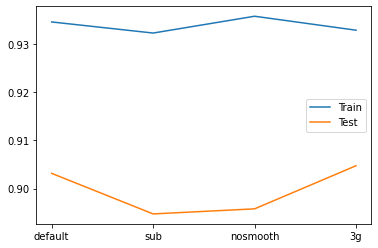

In [ ]:
def classification(vectorizer, model, fit_vect=False):
    if fit_vect:
        vectorizer.fit(train)
    train.vecs = vectorizer.transform(train.content)
    test.vecs = vectorizer.transform(test.content)
    model.fit(train.vecs, train.sent)
    train_preds = model.predict(train.vecs)
    train_f1 = f1_score(train.sent, train_preds, average='micro')
    test_preds = model.predict(test.vecs)
    test_f1 = f1_score(test.sent, test_preds, average='micro')
    return train_f1, test_f1  

tfidf_vectorizers = [TfidfVectorizer(min_df=5,max_df=0.7, lowercase=True,ngram_range=(1,2),stop_words='english'), 
                     TfidfVectorizer(sublinear_tf=True, lowercase=True, ngram_range=(1,2), stop_words='english'),
                     TfidfVectorizer(smooth_idf=False, lowercase=True, ngram_range=(1,2), stop_words='english'),
                     TfidfVectorizer(min_df=5,max_df=0.7, lowercase=True,ngram_range=(1,3),stop_words='english'),
                    ] 
names = ['default', 'sub', 'nosmooth','3g'] 
xs = list(range(len(tfidf_vectorizers)))
results = list()
for i in range(len(tfidf_vectorizers)):
    tfidf_vectorizers[i].fit(train.content)
    #model = MultinomialNB(alpha=0.1) # set a very small value
    model = RandomForestClassifier(n_estimators=100, min_samples_split = 0.05) 
    res = classification(tfidf_vectorizers[i], model) # we need to set fit_vect=True
    results.append(res)
    print(names[i], '=>', res)

plt.plot(xs, results)
plt.xticks(xs, names)
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
def classification(vectorizer, model, fit_vect=False):    
    if fit_vect:
        vectorizer.fit(train)
    train.vecs = vectorizer.transform(train.content)
    test.vecs = vectorizer.transform(test.content)
    model.fit(train.vecs, train.sent)
    train_preds = model.predict(train.vecs)
    train_f1 = f1_score(train.sent, train_preds, average='micro')
    test_preds = model.predict(test.vecs)
    test_f1 = f1_score(test.sent, test_preds, average='micro')

In [ ]:
tfidf_vectorizers=TfidfVectorizer(min_df=5,max_df=0.7, lowercase=True,ngram_range=(1,2),stop_words='english')
tfidf_vectorizers.fit(train.content)

TfidfVectorizer(max_df=0.7, min_df=5, ngram_range=(1, 2), stop_words='english')

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split = 0.05)

In [ ]:
#res = classification(tfidf_vectorizers[i], model)

In [ ]:
train.vecs = tfidf_vectorizers.transform(train.content)
test.vecs = tfidf_vectorizers.transform(test.content)

In [ ]:
model.fit(train.vecs, train.sent)

RandomForestClassifier(min_samples_split=0.05)

In [ ]:
train_preds = model.predict(train.vecs)
train_f1 = f1_score(train.sent, train_preds, average='micro')
test_preds = model.predict(test.vecs)
test_f1 = f1_score(test.sent, test_preds, average='micro')

In [ ]:
train.dtypes

content    object
sent        int64
dtype: object

In [ ]:
# Create a dict with a new employee instance containig the following values
dictt = {'content':['this restuarant is amazing'],'sent':[0]}

example = pd.DataFrame(dictt)
example.vecs=tfidf_vectorizers.transform(example.content)
ex_pred = model.predict(example.vecs)
ex_prob = model.predict_proba(example.vecs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [ ]:
ex_prob

array([[0.00158931, 0.99841069]])

In [ ]:
sent_pred = modelLR1.predict(Xtb)
confusion_matrix(ytb, sent_pred)
print("F1 score:", f1_score(ytb, sent_pred, average='micro'))

F1 score: 0.9865573457908284


In [ ]:
sns.set(style="whitegrid")

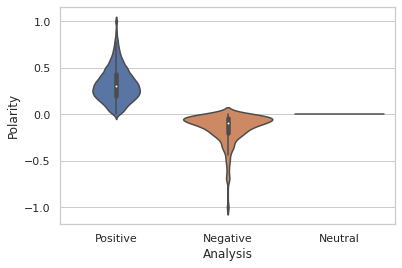

In [ ]:
ax = sns.violinplot(x="Analysis", y="Polarity", data=fin_data)

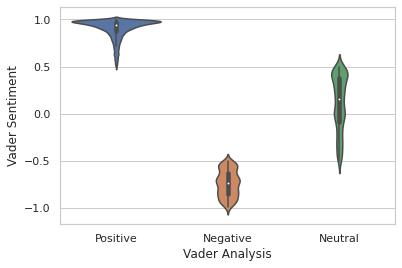

In [ ]:
ax = sns.violinplot(x="Vader Analysis", y="Vader Sentiment", data=fin_data)

Imbalance dataset , oversampling is required

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report 

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(Xtb, ytb)

In [ ]:
X_over.stars.value_counts()

5    22677
4     8844
1     3863
3     3387
2     1431
Name: stars, dtype: int64

In [ ]:
model1 = LogisticRegression(solver='lbfgs', max_iter=10000)
mdl1 = model1.fit(X_over, y_over)

In [ ]:
ypred1=mdl1.predict(X_over)

In [ ]:
cm=confusion_matrix(y_over, ypred1)
print("F1 score:", f1_score(y_over, ypred1, average='micro'))

F1 score: 0.9633600318392119


In [ ]:
ypred1

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)